<a href="https://colab.research.google.com/github/wallisonferreira/data-science-tce/blob/main/aula3_ex1_iris_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemplo KNN usando o iris dataset

Atributos:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

Clsses:
* Iris Setosa
* Iris Versicolour
* Iris Virginica


In [1]:
#importando bibliotecas e dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                      columns= data['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
list(df.columns)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

#Verificando a distribuição das características

In [5]:
l=list(df.columns)
l[0:len(l)-2]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

##Executando um loop 'for' para plotar boxlots de todos as características para  TARGET '0', '1' e '2'

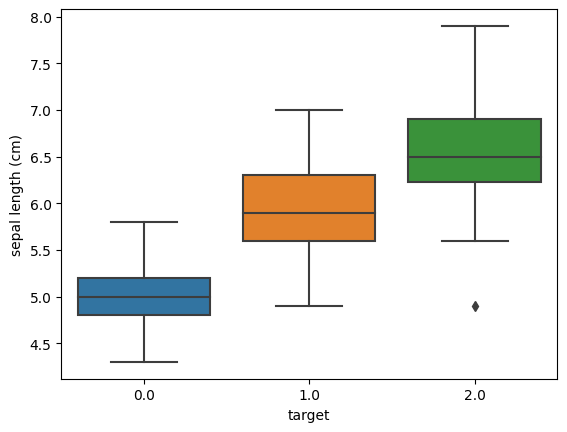

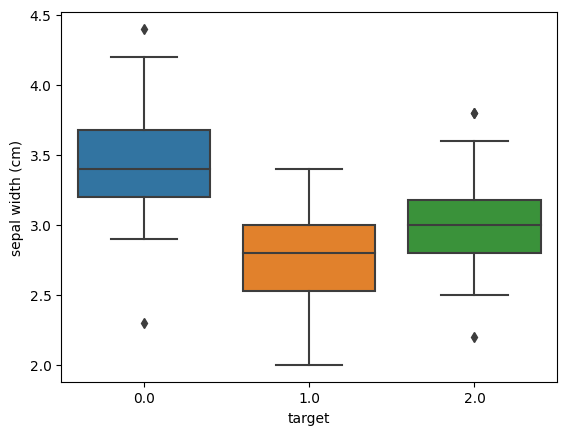

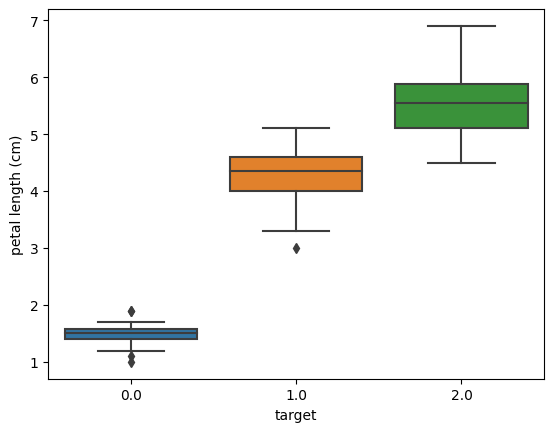

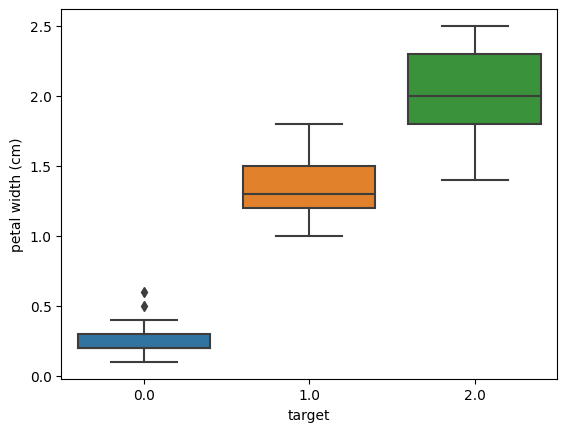

<Figure size 640x480 with 0 Axes>

In [6]:
for i in range(len(l)-1):
    sns.boxplot(x='target',y=l[i], data=df)
    plt.figure()

Normalizando as características usando o pacote sklearn.preprocessing


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Ajustando os dados das características apenas a este estimador (deixando a coluna TARGET de fora)

In [8]:
scaler.fit(df.drop('target',axis=1))
scaled_features = scaler.transform(df.drop('target',axis=1)) #axis=1 indica que queremos remover uma coluna e não uma linha

##Visualizando os dados normalizados

In [9]:
df_feature = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feature.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


#Train/Test split, model fit e prediction

In [10]:
from sklearn.model_selection import train_test_split
X = df_feature
y = df['target']
#random_state -- utilizado para fixar o resultado. Ou seja, sempre separá o mesmas instâncias no treino e no teste.  A ausência da atribuição fará a divisão aleatória
#test_size -- Proporção de em cada subconjunto
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['target'],
                                                    test_size=0.30, random_state=None, shuffle=True)

In [11]:
print(X_test.shape)

(45, 4)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
predicao = knn.predict(X_test)

#Avaliando a qualidade da classificação

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,predicao)
print(conf_mat) # imprime a matriz de confusão

[[11  0  0]
 [ 0 18  1]
 [ 0  3 12]]


<Axes: >

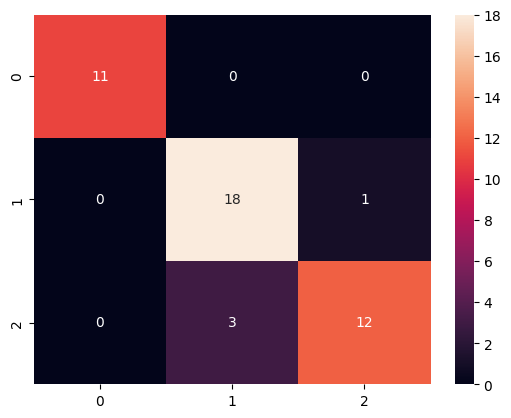

In [15]:
#Visualizando usando a biblioteca seaborn
sns.heatmap(conf_mat, annot=True, xticklabels=['0','1','2'])

In [16]:
print(classification_report(y_test,predicao))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.86      0.95      0.90        19
         2.0       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



1. Precision: Porcentagem de previsões positivas corretas em relação ao total de previsões positivas.

2. Recall: Porcentagem de previsões positivas corretas em relação ao total de positivos reais.

3. F1-Score: Uma média harmônica ponderada de precision e recal. Quanto mais próximo de 1, melhor o modelo.

F1 Socore: 2 * (Precisão * Recall) / (Precisão + Recall)
Usando essas três métricas, podemos entender o quão bem um determinado modelo de classificação é capaz de prever os resultados de alguma variável de resposta.

Suppot: Esses valores simplesmente nos dizem quantos flores pertenciam a cada classe no conjunto de dados de teste (Número de ocorrências de uma dada classe).

In [ ]:
print("Misclassification error rate:",round(np.mean(predicao!=y_test),3))

Misclassification error rate: 0.089


#Escolhendo o k utilizando o método do cotovelo

In [ ]:
tx_error = []

# Will take some time
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tx_error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

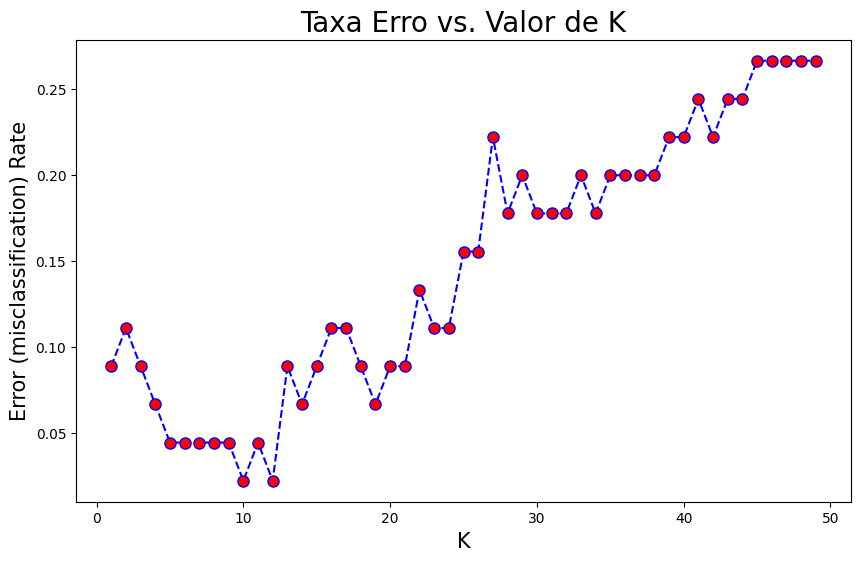

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),tx_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Taxa Erro vs. Valor de K', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)